In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from collections import Counter
from urllib.parse import urlparse

# Set visualization styles
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [50]:
# Load the dataset
df = pd.read_csv('final_data.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")

# Show first few rows
df.head()

Dataset shape: (191731, 3)


,headline,short_description,category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS


In [51]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191731 entries, 0 to 191730
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           191731 non-null  object
 1   short_description  191731 non-null  object
 2   category           191731 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [52]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

# Show columns with missing values
missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

,Missing Values,Percentage


C:\Users\TUNG\AppData\Local\Temp\ipykernel_20476\580602315.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


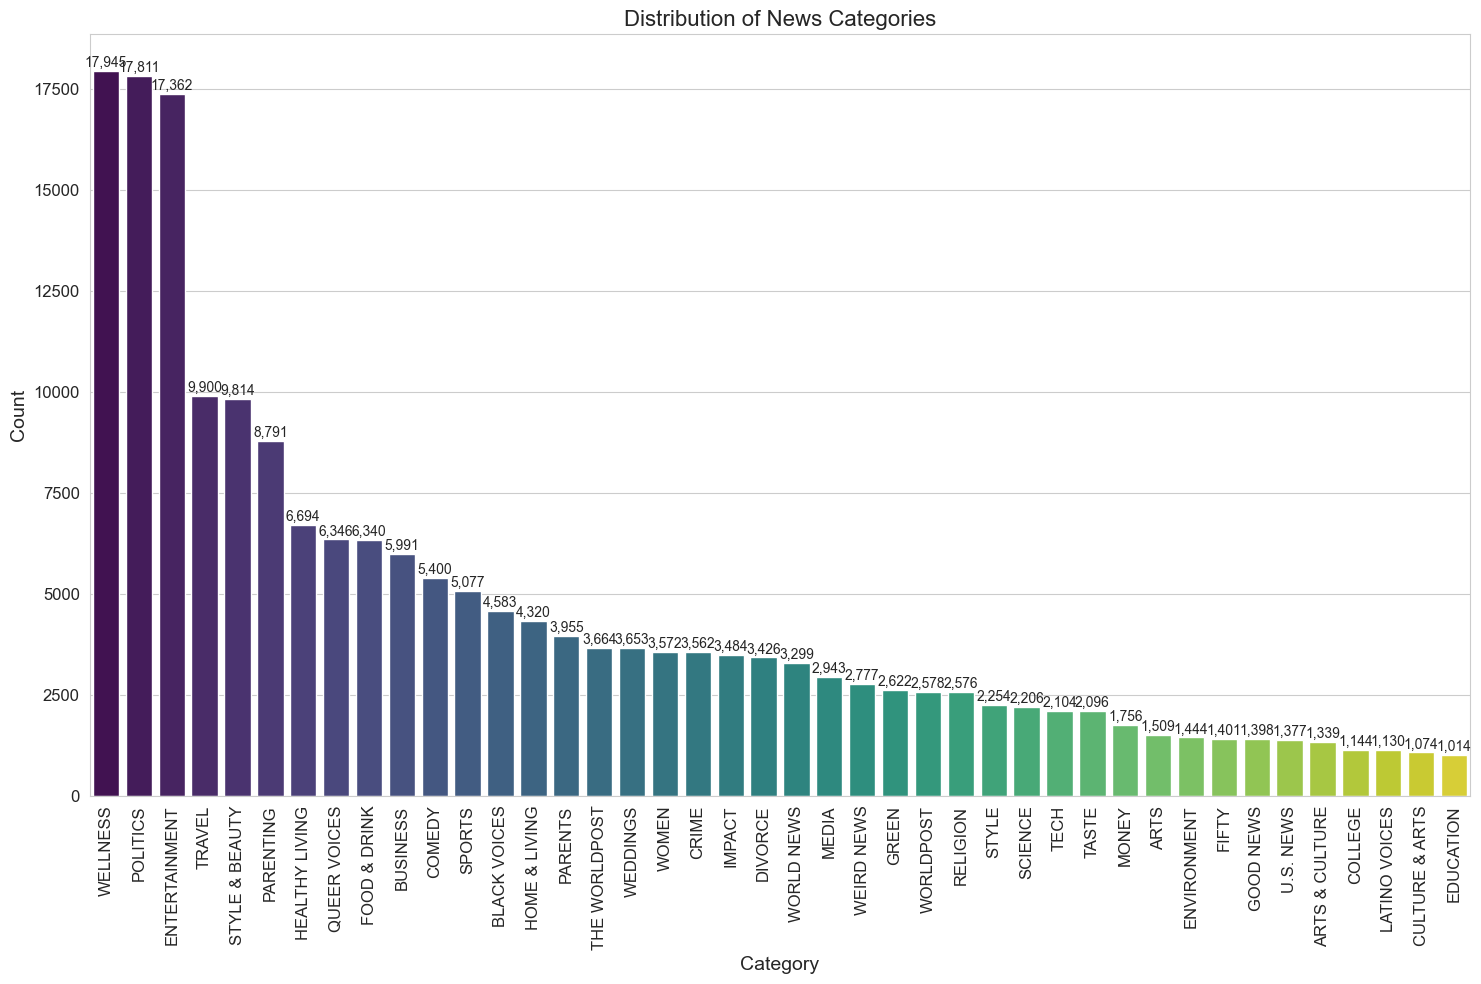

,Category,Percentage
0,WELLNESS,9.359467
1,POLITICS,9.289578
2,ENTERTAINMENT,9.055395
3,TRAVEL,5.163484
4,STYLE & BEAUTY,5.118630
5,PARENTING,4.585070
6,HEALTHY LIVING,3.491350
7,QUEER VOICES,3.309846
8,FOOD & DRINK,3.306716
9,BUSINESS,3.124690


In [43]:
# Category distribution
category_counts = df['category'].value_counts()

# Plot category distribution
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of News Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Add count labels on top of each bar
for i, count in enumerate(category_counts.values):
    ax.text(i, count + 100, f"{count:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate category percentages
category_percentages = (category_counts / len(df) * 100).reset_index()
category_percentages.columns = ['Category', 'Percentage']
category_percentages.sort_values('Percentage', ascending=False).head(10)

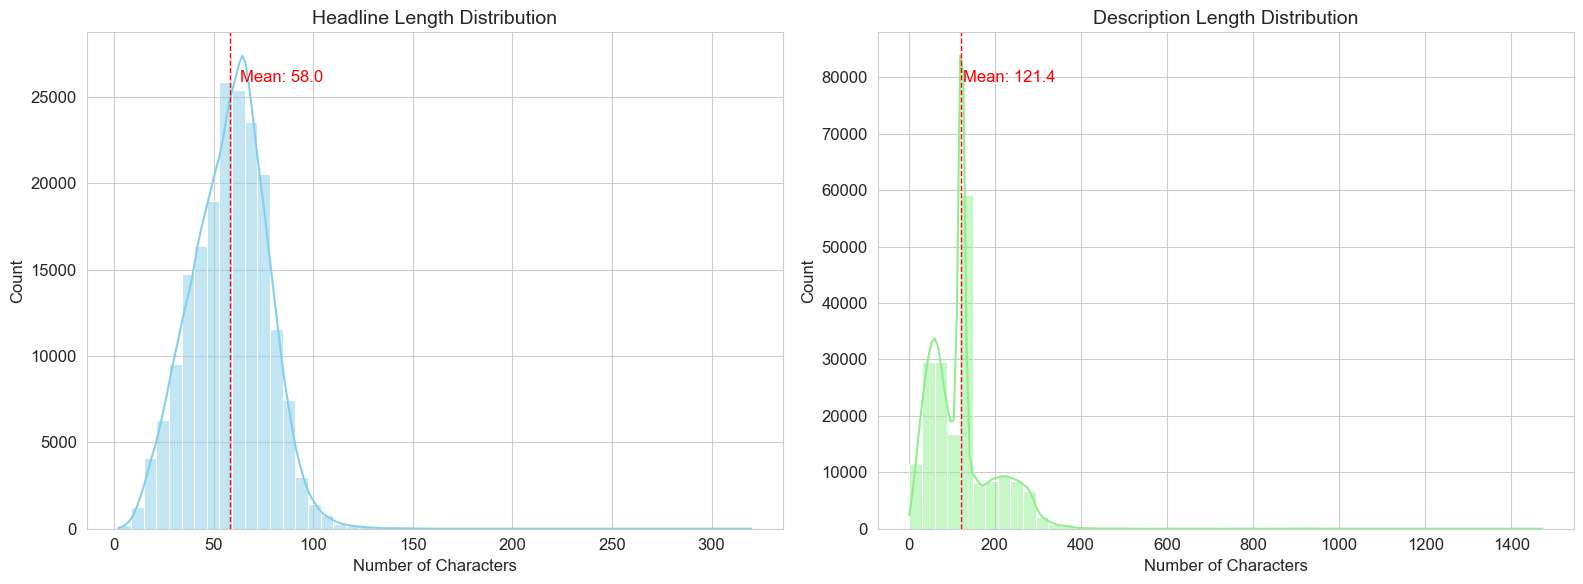

,Headline Length,Description Length
count,191731.000000,191731.000000
mean,57.966338,121.407237
std,18.894071,75.198375
min,2.000000,1.000000
25%,45.000000,65.000000
50%,59.000000,120.000000
75%,71.000000,140.000000
max,320.000000,1472.000000


In [45]:
# Character length analysis
df['headline_length'] = df['headline'].astype(str).apply(len)
df['description_length'] = df['short_description'].astype(str).apply(len)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Headline length distribution
sns.histplot(df['headline_length'], bins=50, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Headline Length Distribution', fontsize=14)
ax1.set_xlabel('Number of Characters', fontsize=12)
ax1.axvline(df['headline_length'].mean(), color='red', linestyle='dashed', linewidth=1)
ax1.text(df['headline_length'].mean() + 5, ax1.get_ylim()[1] * 0.9, 
         f'Mean: {df["headline_length"].mean():.1f}', 
         color='red', fontsize=12)

# Description length distribution
sns.histplot(df['description_length'], bins=50, kde=True, ax=ax2, color='lightgreen')
ax2.set_title('Description Length Distribution', fontsize=14)
ax2.set_xlabel('Number of Characters', fontsize=12)
ax2.axvline(df['description_length'].mean(), color='red', linestyle='dashed', linewidth=1)
ax2.text(df['description_length'].mean() + 5, ax2.get_ylim()[1] * 0.9, 
         f'Mean: {df["description_length"].mean():.1f}', 
         color='red', fontsize=12)

plt.tight_layout()
plt.show()

# Summary statistics
length_stats = pd.DataFrame({
    'Headline Length': df['headline_length'].describe(),
    'Description Length': df['description_length'].describe()
})
length_stats

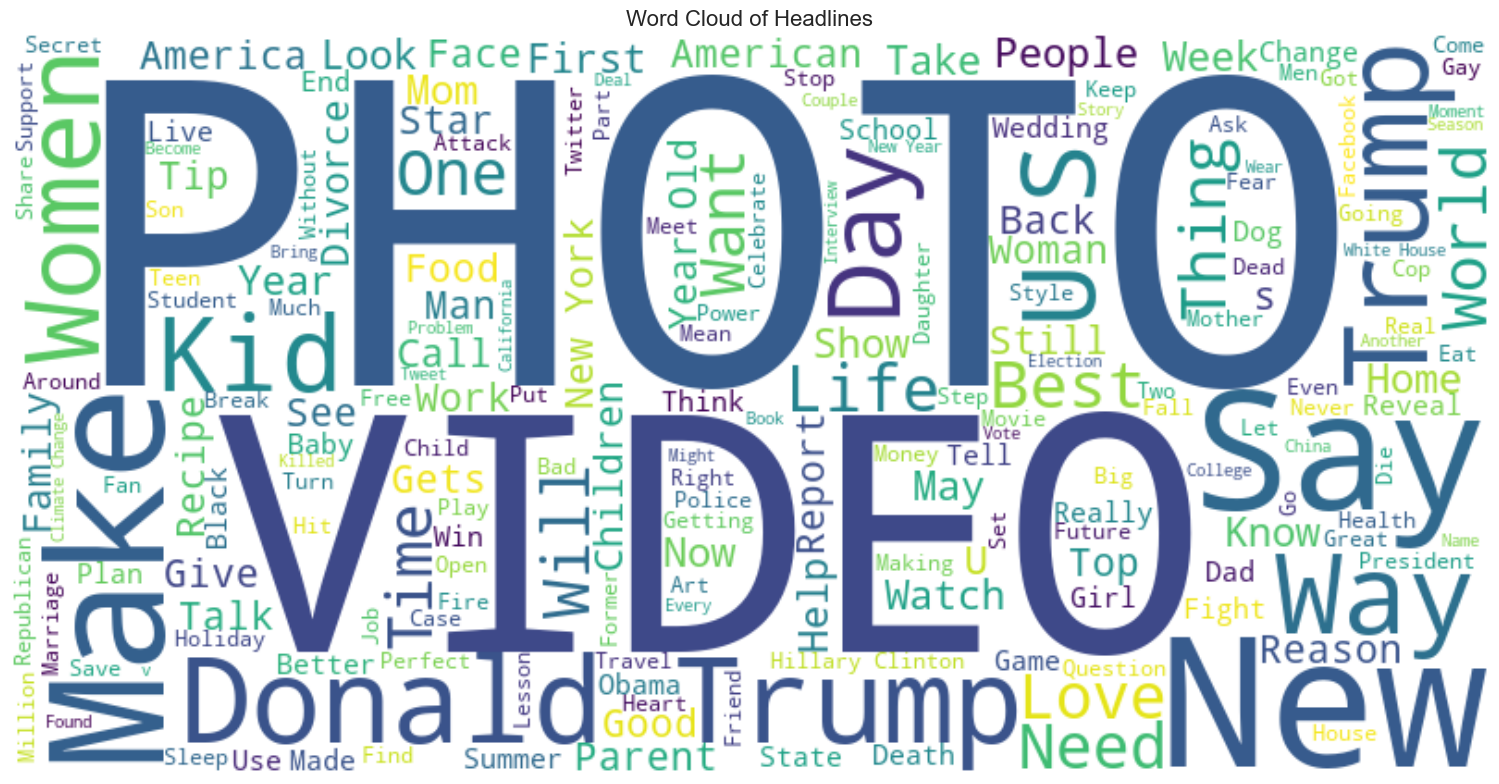

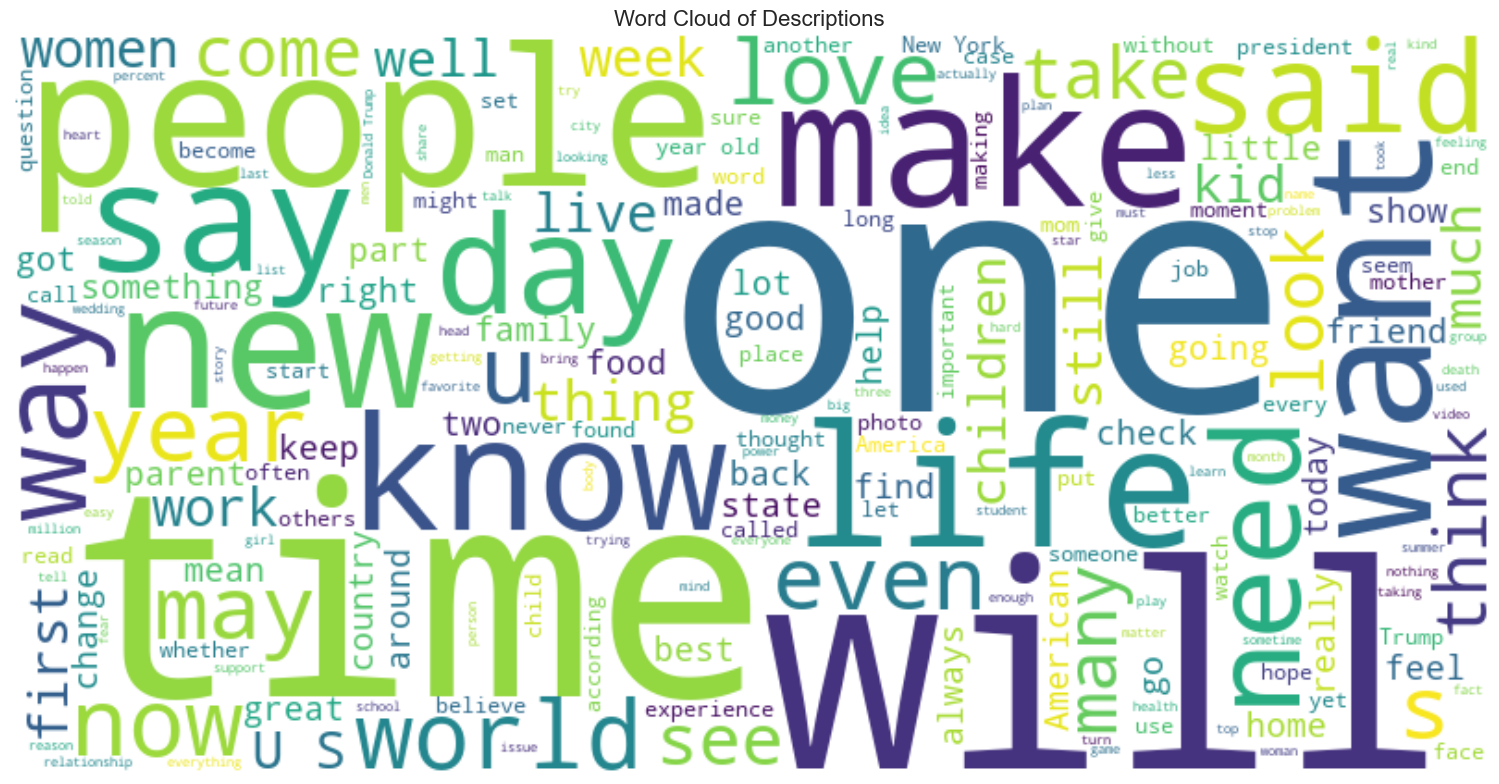

In [46]:
# Create word clouds for headlines and descriptions
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install wordcloud
    from wordcloud import WordCloud

# Function to create word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          max_words=200, contour_width=3, contour_color='steelblue').generate(text)
    
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create word cloud for headlines
headlines_text = ' '.join(df['headline'].astype(str))
create_wordcloud(headlines_text, 'Word Cloud of Headlines')

# Create word cloud for descriptions
descriptions_text = ' '.join(df['short_description'].astype(str))
create_wordcloud(descriptions_text, 'Word Cloud of Descriptions')

In [ ]:
import pandas as pd

# Load the dataset
# Try to use the most recent filtered dataset first
try:
    df = pd.read_csv('final_data.csv')
    print("Using final_data.csv")
except FileNotFoundError:
    try:
        df = pd.read_csv('final_data.csv')
        print("Using final_data.csv")
    except FileNotFoundError:
        df = pd.read_csv('final_data.csv')
        print("Using final_data.csv")

# Drop rows where headline is null
df = df.dropna(subset=['headline'])
print(f"Number of rows dropped due to null headlines: {len(df[df['headline'].isnull()])}")

# Fill null short_descriptions with headlines
null_desc_count = df['short_description'].isnull().sum()
df['short_description'] = df['short_description'].fillna(df['headline'])
print(f"Filled {null_desc_count} null short descriptions with headlines")


# Save the modified dataset
df.to_csv('final_data_cleaned.csv', index=False)
print('Dataset saved as 'final_data_cleaned.csv'")

Using final_data.csv
Number of rows dropped due to null headlines: 0
Filled 0 null short descriptions with headlines
Column 'authors' has been dropped. Dataset saved as 'final_data_cleaned.csv'
